In [97]:
'''
1、线性回归的原型 y=wx+b
2、代价函数：最小二乘法构造  （y-y’）**2.sum（）
3、目标函数：对代价函数求导=0，找全局最小值对应w值


特征选择：
1、经验选择，在原始特征上，根据对业务的理解来人为的主管选择（这样的选择更加靠谱）
2、算法选择：
    回归模型特征选择
            查看每一个特征和目标之间的线性关系，构造线性回归模型，利用回归系数给出重要性评估
    分类模型特征选择
            看数据分布也是特征选择很重要的方式

'''

'\n1、线性回归的原型 y=wx+b\n2、代价函数：最小二乘法构造  （y-y’）**2.sum（）\n3、目标函数：对代价函数求导=0，找全局最小值对应w值\n\n\n特征选择：\n1、经验选择，在原始特征上，根据对业务的理解来人为的主管选择（这样的选择更加靠谱）\n2、算法选择：\n    回归模型特征选择\n            查看每一个特征和目标之间的线性关系，构造线性回归模型，利用回归系数给出重要性评估\n    分类模型特征选择\n            看数据分布也是特征选择很重要的方式\n\n'

In [2]:
# 导入基本包
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 导入KNN回归模型
from sklearn.neighbors import KNeighborsRegressor
# 导入线性回归模型:只能解决回归问题
from sklearn.linear_model import LinearRegression

In [10]:
X = np.linspace(1, 5, 30).reshape((-1, 1))
y = np.sin(X).ravel()

In [14]:
# 引入噪声
noise = np.random.random(30)*0.3 - 0.15
# 对标签值引入噪声
y_ture = y + noise

In [15]:
sns.set()

In [16]:
colors = sns.color_palette("husl")

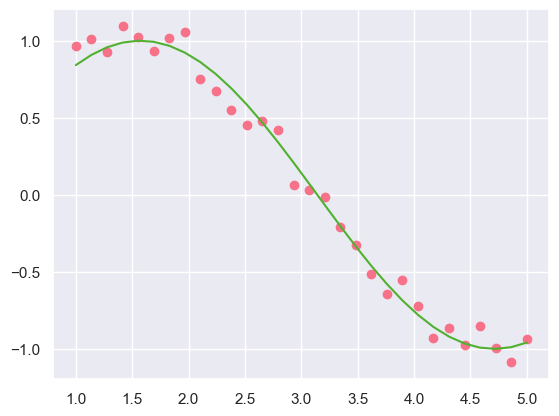

In [18]:
plt.scatter(X ,y_ture, color=colors[0], label="Ture")
plt.plot(X, y, color=colors[2], label="F(x)")

In [19]:
# 构造模型
knn = KNeighborsRegressor()
linear = LinearRegression()

In [20]:
# 训练数据
knn.fit(X, y_ture)
linear.fit(X, y_ture)

LinearRegression()

In [21]:
# 获取测试数据
xmin, xmax = X.min() - 0.5, X.max() + 0.5
X_test = np.linspace(xmin,xmax,30).reshape((-1,1))

In [22]:
X.ravel()

array([1.        , 1.13793103, 1.27586207, 1.4137931 , 1.55172414,
       1.68965517, 1.82758621, 1.96551724, 2.10344828, 2.24137931,
       2.37931034, 2.51724138, 2.65517241, 2.79310345, 2.93103448,
       3.06896552, 3.20689655, 3.34482759, 3.48275862, 3.62068966,
       3.75862069, 3.89655172, 4.03448276, 4.17241379, 4.31034483,
       4.44827586, 4.5862069 , 4.72413793, 4.86206897, 5.        ])

In [23]:
X_test.ravel()

array([0.5       , 0.67241379, 0.84482759, 1.01724138, 1.18965517,
       1.36206897, 1.53448276, 1.70689655, 1.87931034, 2.05172414,
       2.22413793, 2.39655172, 2.56896552, 2.74137931, 2.9137931 ,
       3.0862069 , 3.25862069, 3.43103448, 3.60344828, 3.77586207,
       3.94827586, 4.12068966, 4.29310345, 4.46551724, 4.63793103,
       4.81034483, 4.98275862, 5.15517241, 5.32758621, 5.5       ])

In [24]:
y1_ = knn.predict(X_test)
y2_ = linear.predict(X_test)

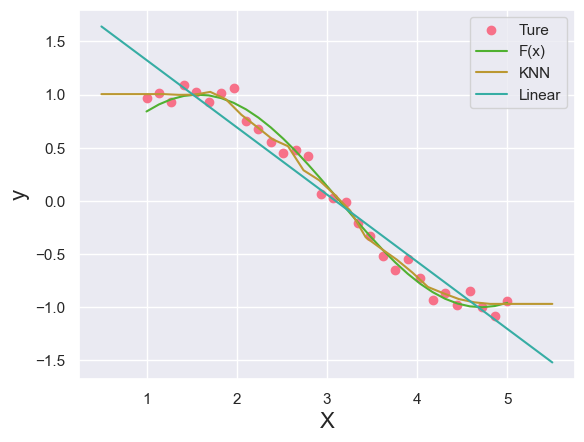

In [26]:
plt.scatter(X ,y_ture, color=colors[0], label="Ture")
plt.plot(X, y, color=colors[2], label="F(x)")
plt.xlabel("X",fontsize=16)
plt.ylabel("y",fontsize=16)

# 绘制预测结果
plt.plot(X_test, y1_, color=colors[1], label="KNN")
plt.plot(X_test, y2_, color=colors[3], label="Linear")
plt.legend()
plt.show()

In [27]:
# 获取线性回归的解：y=w*x+b

In [34]:
# 获取斜率
w = linear.coef_

In [35]:
# 获取截距
k = linear.intercept_

In [36]:
# 验证这个解是否与预测结果吻合
test = np.linspace(2,4,20)
f = lambda x: w*x + k

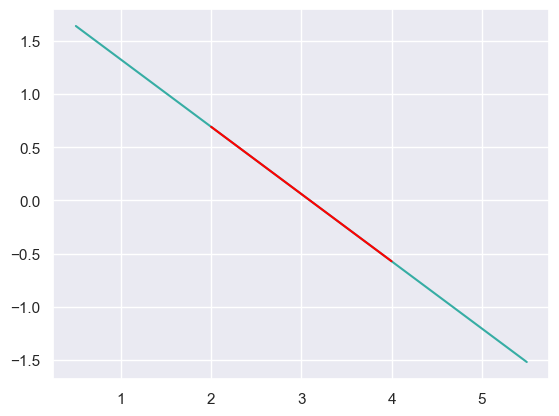

In [38]:
plt.plot(X_test, y2_, color=colors[3], label="Linear")
plt.plot(test, f(test), color="red")

In [39]:
f(3.1)

array([-0.00229465])

In [ ]:
# 线性回归的特点
# 1、线性回归一定是一条直线，所以可能容易欠拟合
# 2、线性回归的求解效率高于KNN

In [40]:
# 糖尿病的例子
from sklearn.datasets import load_diabetes

In [42]:
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [43]:
diabetes = load_diabetes()

In [44]:
data = diabetes.data
feature_names = diabetes.feature_names
target = diabetes.target

In [47]:
df = DataFrame(data=data, columns=feature_names)

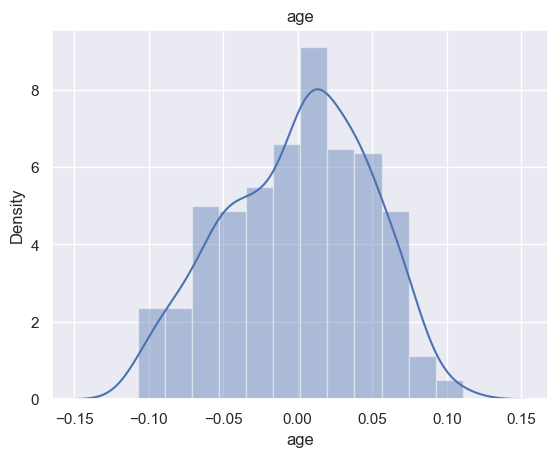

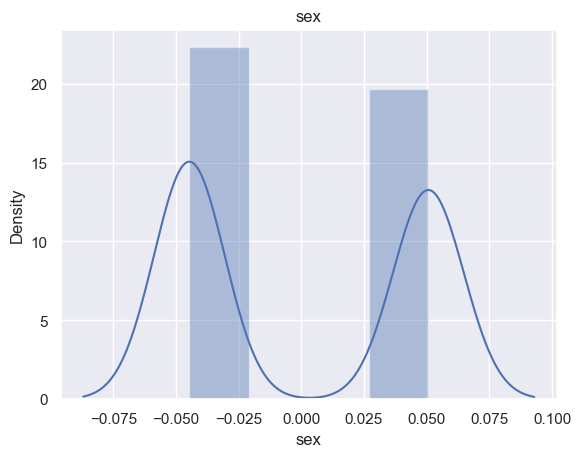

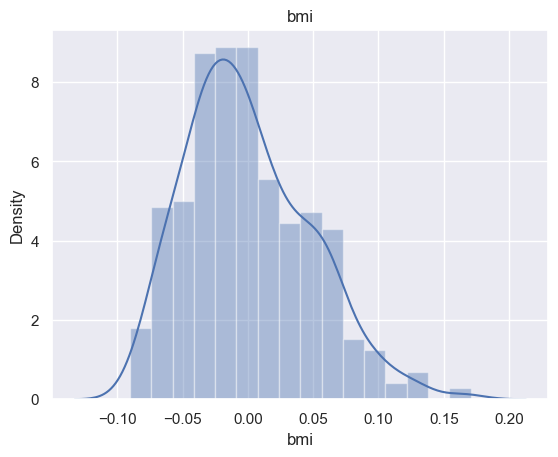

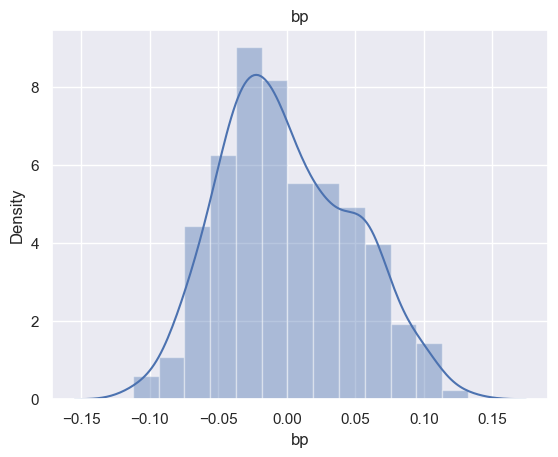

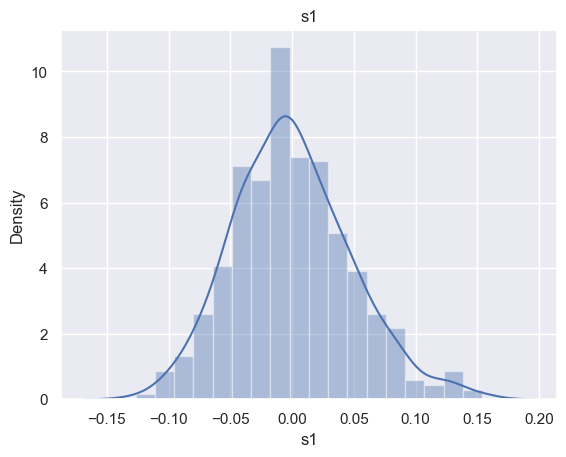

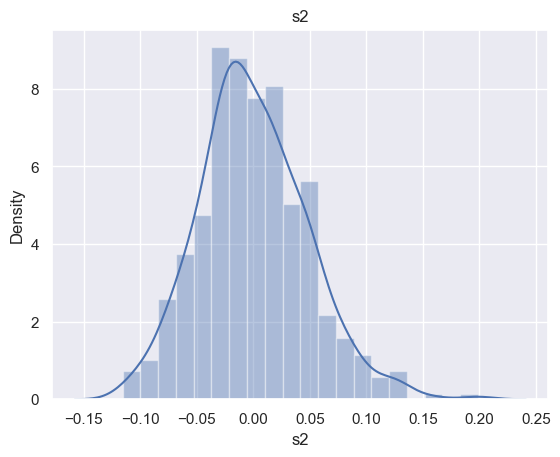

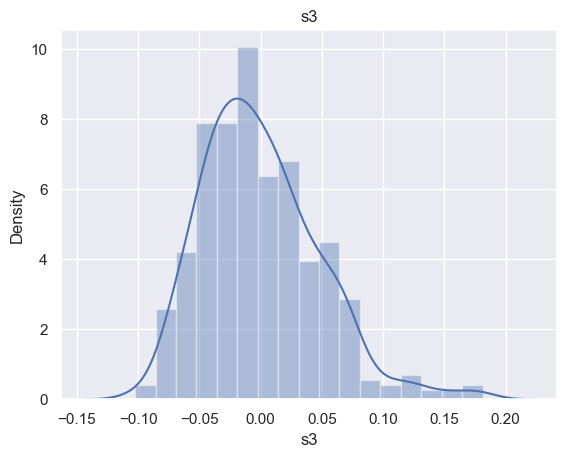

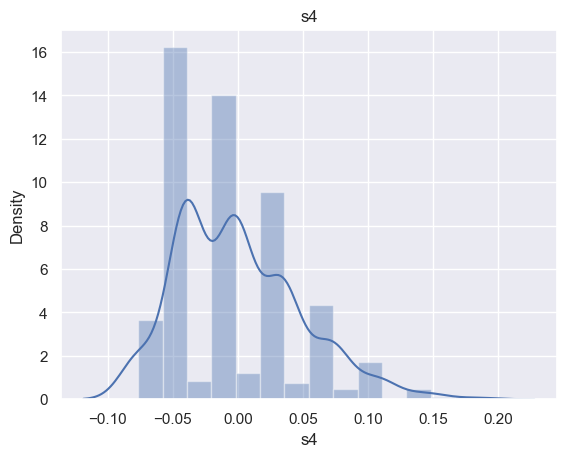

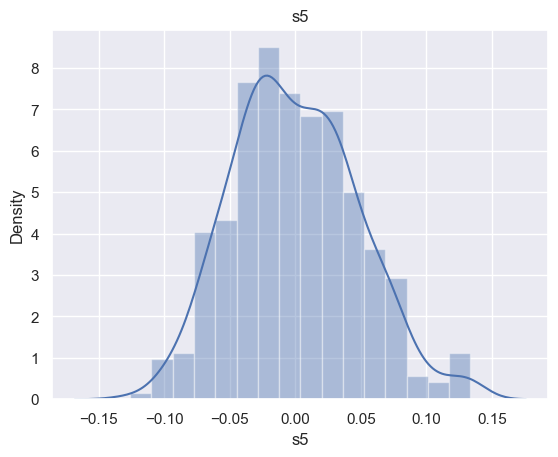

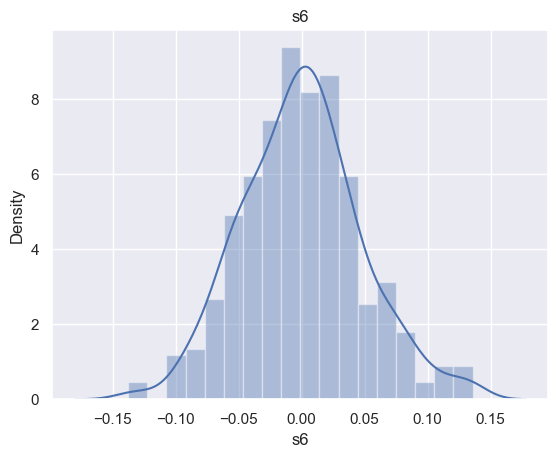

In [48]:
# 观察数据分布
# 发现数据集的分布都是一种接近于正态分布的分布结构
# 这样的数据分布有两个好处：
# 1、大大降低算法求解复杂程度
# 2、因为数据量级被缩小到0附近，所以会降低噪声数据对算法的影响，进而提升算法的准确度
for col in df:
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

In [49]:
# 分析特征与目标的相关度
# 有助于我们去选择有效特征，剔除无用特征
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

Text(0, 0.5, 'target')

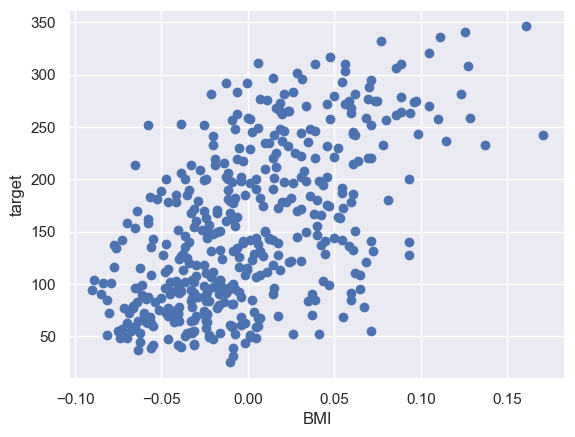

In [50]:
# 以bmi为例，我们研究bmi对血糖含量的影响
plt.scatter(df.bmi, target)
plt.xlabel("BMI")
plt.ylabel("target")

Text(0, 0.5, 'target')

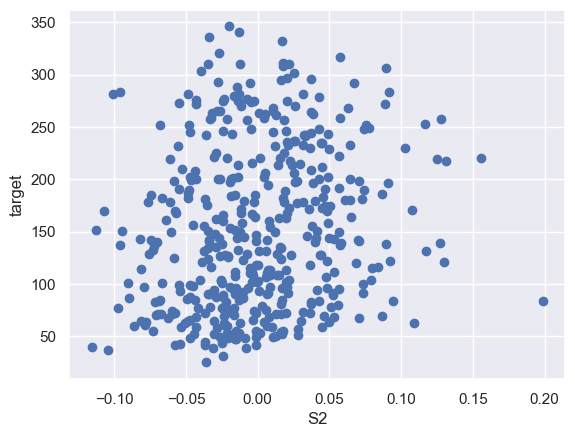

In [52]:
# 以s2为例，我们研究bmi对血糖含量的影响
plt.scatter(df.s2, target)
plt.xlabel("S2")
plt.ylabel("target")

In [53]:
# 使用BMI和target建模
linear = LinearRegression()
linear.fit(df[["bmi"]], target)

LinearRegression()

In [54]:
xmin, xmax = df.bmi.min(), df.bmi.max()
test = np.linspace(xmin,xmax,50).reshape((-1,1))
y_ = linear.predict(test)

949.4352603840372


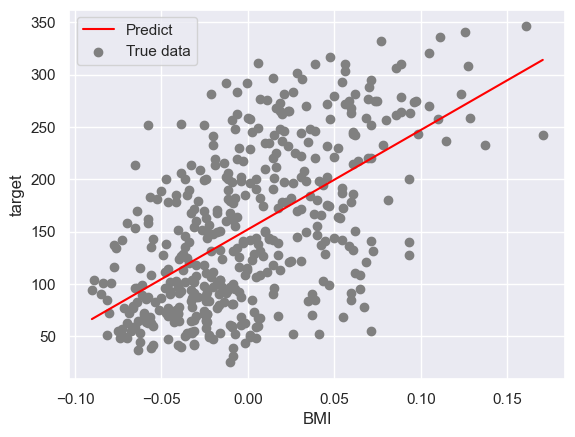

In [60]:
plt.plot(test, y_, label="Predict", color="red")
plt.scatter(df.bmi, target, label="True data", color="gray")
plt.xlabel("BMI")
plt.ylabel("target")
plt.legend()


print(linear.coef_[0])

In [63]:
# 对所有特征做相关性分析
importances = {}
for col_name in df:
    linear = LinearRegression()
    linear.fit(df[[col_name]],target)
    importances[col_name] = linear.coef_[0]

<AxesSubplot:>

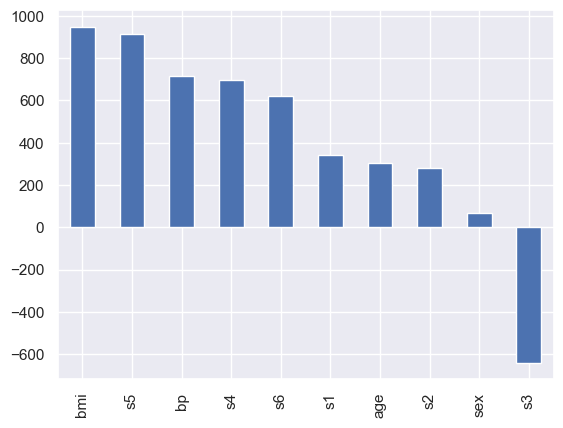

In [65]:
# 展示各个特征对目标的影响
Series(importances).sort_values(ascending=False).plot(kind='bar')

In [67]:
# 因为sex对目标的影响最小，所以先把sex剔除
train = df.drop("sex",axis=1)
train.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [68]:
# 建模：先查看基模型
linear = LinearRegression()
knn = KNeighborsRegressor()

In [69]:
train.shape

(442, 9)

In [70]:
from sklearn.model_selection import cross_val_predict

In [71]:
result = cross_val_predict(linear,train, target, cv=10)

In [72]:
result

array([214.63064205,  62.20425504, 185.7740467 , 155.02865011,
       116.51034717,  99.03021096,  89.34632414, 133.90497149,
       174.6212614 , 204.20704511,  86.27382825, 107.68075535,
       107.43227966, 173.99984285,  96.64154075, 179.9074286 ,
       203.47756441, 189.80534275, 136.85784778, 117.86450023,
       110.31376492, 102.83742259, 110.68929468, 262.35553126,
       156.55226678, 156.42756464,  87.73539536, 173.88309305,
       120.28322879, 194.00000841, 155.54950714,  65.56849632,
       261.64843512, 102.48265783,  69.36827743, 106.8041092 ,
       197.21464729, 150.70781816, 249.30586024, 152.60050023,
       164.83008884,  67.19333081, 153.39692031,  79.80757368,
       225.02572726, 133.0762952 , 135.86265861,  99.56029587,
        83.71691162, 198.68587406, 146.24732523, 178.09412816,
       126.93974443, 144.27374709, 134.45505615,  68.04884136,
       200.14691729,  73.69097277, 102.5219616 , 147.59953835,
       111.36159098, 191.05826498,  78.27195906,  89.09

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
# linear的损失
mean_squared_error(target, result)

3091.9085013578883

In [78]:
result1 = cross_val_predict(knn, train, target, cv=10)

In [79]:
# knn的损失
mean_squared_error(target, result1)

3687.455113122172

In [81]:
# 模型优化：调参
from sklearn.model_selection import train_test_split
# 计算一个回归模型的平均损失的函数
def cross_loss(model,train,target,count):
#     保留每一组样本集拆分组合下对应的模型的损失
    train_loss_list = []
    test_loss_list = []
    for i in range(count):
        X_train, X_test, y_train,y_test = train_test_split(train, target, test_size=0.2, random_state=i)
        model.fit(X_train, y_train)
#         计算训练集和测试集的损失
        train_loss = mean_squared_error(y_train, model.predict(X_train))
        test_loss = mean_squared_error(y_test, model.predict(X_test))
#         所有模型的损失汇总
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        
#      返回每一个模型在不同训练集和测试集上MSE的均值   
    return np.array(train_loss_list).mean(), np.array(test_loss_list).mean()

In [85]:
# 预测不同模型损失的函数，主要是用来比较不同模型的评分
def predict_loss(k_list, train, target, count):
#     保存不同模型的平均损失
    train_list = []
    test_list = []
#     利用不同参数构造不同的模型，在计算不同模型的平均损失
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors=k)
        train_mean_loss, test_mean_loss = cross_loss(model, train, target, count)
#         汇总所有模型的平均损失
        train_list.append(train_mean_loss)
        test_list.append(test_mean_loss)
#         把所有k值对心的模型的平均损失汇总返回
    return DataFrame(data={
        "train_loss":train_list,
        "test_loss":test_list
    },index=k_list)

In [86]:
np.sqrt(train.shape[0]*0.8)

18.804254837669053

In [88]:
k_list = np.arange(3, 21 ,step=4)
result2 = predict_loss(k_list, train, target, 10)

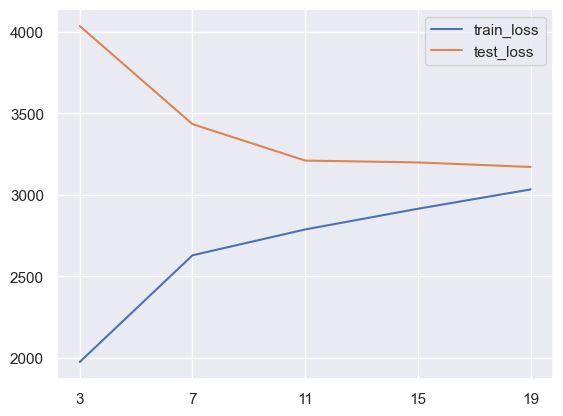

In [89]:
result2.plot()
plt.xticks(result2.index)
plt.show()

In [94]:
best_knn = KNeighborsRegressor(n_neighbors=21)

In [95]:
y_ = cross_val_predict(best_knn,train, target, cv=10)

In [96]:
mean_squared_error(target, y_)

3335.316854947107

In [ ]:
# 可以继续考虑删除更多的特征，对比是否能够得到更好的模型（损失更小）